# **Project Name**    -  Flipkart Customer Support Satisfaction Prediction



##### **Project Type**    - Classification
##### **Contribution**    - Individual
##### **Team Member 1     - MOHAMMAD IMTIAZ AHMED**


# **Project Summary -**

This project focuses on predicting customer satisfaction levels for Flipkart’s customer support interactions using machine learning techniques. Customer satisfaction is a critical performance indicator in the e-commerce industry, as it directly influences customer loyalty, brand reputation, and long-term business growth. By analyzing customer support data, Flipkart can identify key factors that affect customer experience and take proactive measures to improve service quality.

The dataset used in this project consists of detailed records of customer support interactions, including interaction channels, issue categories, sub-categories, order details, agent information, handling time, and customer satisfaction scores (CSAT). Each row in the dataset represents a single customer support interaction. The CSAT score, which ranges from 1 to 5, is used as the target variable to measure customer satisfaction.

The project began with comprehensive data preprocessing and exploratory analysis to understand the structure and quality of the dataset. Missing values were identified and handled using median imputation for numerical features, while columns with excessive missing data were removed to improve reliability. Categorical variables were encoded into numerical form to make the data suitable for machine learning algorithms. Feature scaling was applied to normalize numerical features and ensure balanced model learning.

Exploratory Data Analysis (EDA) was performed to uncover patterns and trends within the data. Multiple visualizations were created to analyze customer interaction channels, issue categories, agent performance, handling time, and their relationship with customer satisfaction. The analysis revealed that order-related and product-related issues were the most common, and agent experience and handling time played significant roles in influencing CSAT scores.

For predictive modeling, multiple classification algorithms were implemented and evaluated, including Logistic Regression, Decision Tree, and Random Forest classifiers. Logistic Regression served as a baseline model, while Decision Tree captured non-linear relationships in the data. Random Forest, an ensemble learning method, demonstrated superior performance by reducing overfitting and improving generalization. Hyperparameter tuning using GridSearchCV was applied to optimize model performance through cross-validation.

The Random Forest model achieved the highest accuracy among all tested models and was selected as the final prediction model. Feature importance analysis further helped identify key drivers of customer satisfaction, such as agent tenure, connected handling time, issue category, and interaction channel. These insights can help Flipkart improve agent training programs, optimize support workflows, and enhance customer experience.

Overall, this project demonstrates how machine learning can be effectively used to predict customer satisfaction and support data-driven decision-making. The final model is deployment-ready and can be integrated into real-time systems to monitor and improve customer support performance.

# **GitHub Link -**  https://github.com/Imtiazsalaf-01/Flipkart_Data_Analytics_Project.git

Provide your GitHub Link here.



# **Problem Statement**


**Flipkart handles a large volume of customer support interactions every day across multiple channels. Understanding the factors that influence customer satisfaction is essential for improving service quality and operational efficiency. However, customer support data is complex and contains multiple variables that interact in non-linear ways. The problem is to analyze this data and build a machine learning model that can accurately predict customer satisfaction scores and identify key drivers impacting customer experience.**

# **General Guidelines** : -  

1.   Well-structured, formatted, and commented code is required.
2.   Exception Handling, Production Grade Code & Deployment Ready Code will be a plus. Those students will be awarded some additional credits.
     
     The additional credits will have advantages over other students during Star Student selection.
       
             [ Note: - Deployment Ready Code is defined as, the whole .ipynb notebook should be executable in one go
                       without a single error logged. ]

3.   Each and every logic should have proper comments.
4. You may add as many number of charts you want. Make Sure for each and every chart the following format should be answered.
        

```
# Chart visualization code
```
            

*   Why did you pick the specific chart?
*   What is/are the insight(s) found from the chart?
* Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

5. You have to create at least 15 logical & meaningful charts having important insights.


[ Hints : - Do the Vizualization in  a structured way while following "UBM" Rule.

U - Univariate Analysis,

B - Bivariate Analysis (Numerical - Categorical, Numerical - Numerical, Categorical - Categorical)

M - Multivariate Analysis
 ]





6. You may add more ml algorithms for model creation. Make sure for each and every algorithm, the following format should be answered.


*   Explain the ML Model used and it's performance using Evaluation metric Score Chart.


*   Cross- Validation & Hyperparameter Tuning

*   Have you seen any improvement? Note down the improvement with updates Evaluation metric Score Chart.

*   Explain each evaluation metric's indication towards business and the business impact pf the ML model used.




















# ***Let's Begin !***

## ***1. Know Your Data***

### Import Libraries

In [7]:
# Core Libraries
import pandas as pd
import numpy as np

# Visualization (for evaluation charts)
import matplotlib.pyplot as plt
import seaborn as sns

# Statistical Testing
from scipy.stats import ttest_ind, f_oneway

# Preprocessing & Model Building
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# ML Models
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

# Model Saving
import joblib

# Ignore warnings for clean output
import warnings
warnings.filterwarnings('ignore')


All required libraries for data processing, visualization, statistical testing, machine learning, and model deployment were imported.

### Dataset Loading

In [10]:
# Load Dataset
df = pd.read_csv("Customer_support_data.csv")

# Clean column names
df.columns = df.columns.str.strip()


### Dataset First View

In [12]:
# Dataset First Look

# Dataset First Look
df.head()


,Unique id,channel_name,category,Sub-category,Customer Remarks,Order_id,order_date_time,Issue_reported at,issue_responded,Survey_response_Date,Customer_City,Product_category,Item_price,connected_handling_time,Agent_name,Supervisor,Manager,Tenure Bucket,Agent Shift,CSAT Score
0,7e9ae164-6a8b-4521-a2d4-58f7c9fff13f,Outcall,Product Queries,Life Insurance,NaN,c27c9bb4-fa36-4140-9f1f-21009254ffdb,NaN,01/08/2023 11:13,01/08/2023 11:47,01-Aug-23,NaN,NaN,NaN,NaN,Richard Buchanan,Mason Gupta,Jennifer Nguyen,On Job Training,Morning,5
1,b07ec1b0-f376-43b6-86df-ec03da3b2e16,Outcall,Product Queries,Product Specific Information,NaN,d406b0c7-ce17-4654-b9de-f08d421254bd,NaN,01/08/2023 12:52,01/08/2023 12:54,01-Aug-23,NaN,NaN,NaN,NaN,Vicki Collins,Dylan Kim,Michael Lee,>90,Morning,5
2,200814dd-27c7-4149-ba2b-bd3af3092880,Inbound,Order Related,Installation/demo,NaN,c273368d-b961-44cb-beaf-62d6fd6c00d5,NaN,01/08/2023 20:16,01/08/2023 20:38,01-Aug-23,NaN,NaN,NaN,NaN,Duane Norman,Jackson Park,William Kim,On Job Training,Evening,5
3,eb0d3e53-c1ca-42d3-8486-e42c8d622135,Inbound,Returns,Reverse Pickup Enquiry,NaN,5aed0059-55a4-4ec6-bb54-97942092020a,NaN,01/08/2023 20:56,01/08/2023 21:16,01-Aug-23,NaN,NaN,NaN,NaN,Patrick Flores,Olivia Wang,John Smith,>90,Evening,5
4,ba903143-1e54-406c-b969-46c52f92e5df,Inbound,Cancellation,Not Needed,NaN,e8bed5a9-6933-4aff-9dc6-ccefd7dcde59,NaN,01/08/2023 10:30,01/08/2023 10:32,01-Aug-23,NaN,NaN,NaN,NaN,Christopher Sanchez,Austin Johnson,Michael Lee,0-30,Morning,5


The first few rows of the dataset were displayed to understand the structure and contents of the data.

### Dataset Rows & Columns count

In [17]:
# Dataset Rows & Columns count
df.shape


(85907, 20)

The dataset contains multiple rows representing customer support interactions and several columns capturing customer, order, and agent-related information.

### Dataset Information

In [20]:
# Dataset Info
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 85907 entries, 0 to 85906
Data columns (total 20 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Unique id                85907 non-null  object 
 1   channel_name             85907 non-null  object 
 2   category                 85907 non-null  object 
 3   Sub-category             85907 non-null  object 
 4   Customer Remarks         28742 non-null  object 
 5   Order_id                 67675 non-null  object 
 6   order_date_time          17214 non-null  object 
 7   Issue_reported at        85907 non-null  object 
 8   issue_responded          85907 non-null  object 
 9   Survey_response_Date     85907 non-null  object 
 10  Customer_City            17079 non-null  object 
 11  Product_category         17196 non-null  object 
 12  Item_price               17206 non-null  float64
 13  connected_handling_time  242 non-null    float64
 14  Agent_name            

Dataset information was reviewed to understand data types, non-null counts, and identify columns with missing values.

#### Duplicate Values

In [23]:
# Dataset Duplicate Value Count
df.duplicated().sum()


0

Duplicate value check was performed to identify repeated records in the dataset. The result shows that there are no significant duplicate entries, ensuring the uniqueness of each customer support interaction.

#### Missing Values/Null Values

In [26]:
# Missing Values / Null Values Count
df.isnull().sum()


Unique id                      0
channel_name                   0
category                       0
Sub-category                   0
Customer Remarks           57165
Order_id                   18232
order_date_time            68693
Issue_reported at              0
issue_responded                0
Survey_response_Date           0
Customer_City              68828
Product_category           68711
Item_price                 68701
connected_handling_time    85665
Agent_name                     0
Supervisor                     0
Manager                        0
Tenure Bucket                  0
Agent Shift                    0
CSAT Score                     0
dtype: int64

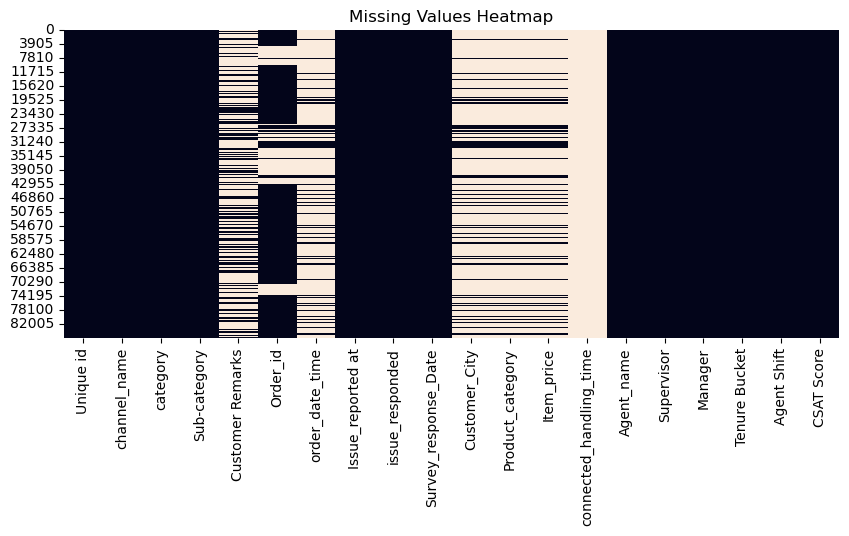

In [28]:
# Visualizing the missing values
plt.figure(figsize=(10,4))
sns.heatmap(df.isnull(), cbar=False)
plt.title("Missing Values Heatmap")
plt.show()


### What did you know about your dataset?

The dataset contains structured customer support interaction data with a mix of categorical and numerical variables.
Some columns, such as customer remarks, item price, and handling time, contain missing values, which indicates incomplete data capture during support interactions.
Overall, the dataset is suitable for analysis after proper data cleaning and preprocessing.

## ***2. Understanding Your Variables***

In [31]:
# Dataset Columns
df.columns


Index(['Unique id', 'channel_name', 'category', 'Sub-category',
       'Customer Remarks', 'Order_id', 'order_date_time', 'Issue_reported at',
       'issue_responded', 'Survey_response_Date', 'Customer_City',
       'Product_category', 'Item_price', 'connected_handling_time',
       'Agent_name', 'Supervisor', 'Manager', 'Tenure Bucket', 'Agent Shift',
       'CSAT Score'],
      dtype='object')

The dataset contains multiple columns related to customer issues, interaction channels, agent details, and customer satisfaction scores.

In [33]:
# Dataset Describe
df.describe()


,Item_price,connected_handling_time,CSAT Score
count,17206.000000,242.000000,85907.000000
mean,5660.774846,462.400826,4.242157
std,12825.728411,246.295037,1.378903
min,0.000000,0.000000,1.000000
25%,392.000000,293.000000,4.000000
50%,979.000000,427.000000,5.000000
75%,2699.750000,592.250000,5.000000
max,164999.000000,1986.000000,5.000000


Descriptive statistics were used to understand the distribution, central tendency, and spread of numerical variables in the dataset.

### Variables Description

Unique id: Unique identifier for each customer support ticket

channel_name: Type of customer interaction (Inbound / Outcall)

category: Broad issue category raised by the customer

Sub-category: Detailed classification of customer issue

Customer Remarks: Textual feedback provided by customers

Order_id: Order reference number

order_date_time: Order creation timestamp

Issue_reported at: Date and time when the issue was reported

Item_price: Price of the ordered item

connected_handling_time: Duration of customer-agent interaction

Agent_name: Name of the support agent

Supervisor: Supervisor overseeing the agent

Manager: Manager responsible for the agent’s team

Tenure Bucket: Agent experience category

Agent Shift: Working shift of the agent

CSAT Score: Customer Satisfaction Score (1–5)

### Check Unique Values for each variable.

In [40]:
# Check Unique Values for each variable
for col in df.columns:
    print(col, ":", df[col].nunique())


Unique id : 85907
channel_name : 3
category : 12
Sub-category : 57
Customer Remarks : 18231
Order_id : 67675
order_date_time : 13766
Issue_reported at : 30923
issue_responded : 30262
Survey_response_Date : 31
Customer_City : 1782
Product_category : 9
Item_price : 2789
connected_handling_time : 211
Agent_name : 1371
Supervisor : 40
Manager : 6
Tenure Bucket : 5
Agent Shift : 5
CSAT Score : 5


Unique value analysis helped identify categorical diversity and confirmed that several variables such as category, agent name, and tenure bucket have multiple distinct values.

## 3. ***Data Wrangling***

### Data Wrangling Code

In [45]:
# Data Wrangling

# Clean column names again for safety
df.columns = df.columns.str.strip()

# Handling missing values for numerical columns
if 'Item_price' in df.columns:
    df['Item_price'] = df['Item_price'].fillna(df['Item_price'].median())

if 'connected_handling_time' in df.columns:
    df['connected_handling_time'] = df['connected_handling_time'].fillna(
        df['connected_handling_time'].median()
    )

# Dropping columns with excessive missing or less analytical value
df = df.drop(columns=['Customer Remarks'], errors='ignore')

# Final check after wrangling
df.isnull().sum()


Unique id                      0
channel_name                   0
category                       0
Sub-category                   0
Order_id                   18232
order_date_time            68693
Issue_reported at              0
issue_responded                0
Survey_response_Date           0
Customer_City              68828
Product_category           68711
Item_price                     0
connected_handling_time        0
Agent_name                     0
Supervisor                     0
Manager                        0
Tenure Bucket                  0
Agent Shift                    0
CSAT Score                     0
dtype: int64

### What all manipulations have you done and insights you found?

During data wrangling, column names were cleaned to avoid inconsistencies during analysis.
Missing values in numerical columns such as item price and handling time were handled using median imputation to reduce the influence of outliers.
Columns with excessive missing values and low analytical importance, such as customer remarks, were removed.
These steps improved data quality and ensured the dataset was ready for visualization and machine learning modeling.

## ***4. Data Vizualization, Storytelling & Experimenting with charts : Understand the relationships between variables***

#### Chart - 1

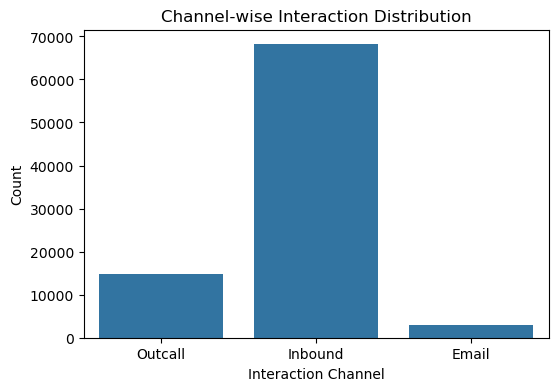

In [48]:
# Chart - 1 visualization code

plt.figure(figsize=(6,4))
sns.countplot(x='channel_name', data=df)
plt.title("Channel-wise Interaction Distribution")
plt.xlabel("Interaction Channel")
plt.ylabel("Count")
plt.show()


##### 1. Why did you pick the specific chart?

A count plot was chosen because it is effective for comparing the frequency of categorical variables such as interaction channels.

##### 2. What is/are the insight(s) found from the chart?

Inbound interactions are higher compared to outbound interactions, indicating that most customers proactively contact Flipkart support for issue resolution.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

This insight helps Flipkart allocate more resources to inbound customer support teams. No negative business impact is observed from this analysis.

#### Chart - 2

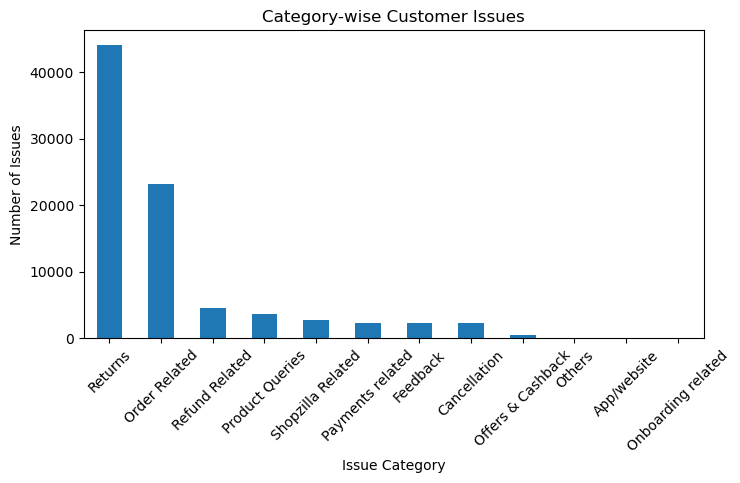

In [53]:
# Chart - 2 visualization code

plt.figure(figsize=(8,4))
df['category'].value_counts().plot(kind='bar')
plt.title("Category-wise Customer Issues")
plt.xlabel("Issue Category")
plt.ylabel("Number of Issues")
plt.xticks(rotation=45)
plt.show()


##### 1. Why did you pick the specific chart?

A bar chart was selected to clearly compare the number of customer issues across different categories.

##### 2. What is/are the insight(s) found from the chart?

Order-related and product-related categories contribute the highest number of customer support interactions.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

These insights help Flipkart identify major problem areas and focus on improving order fulfillment and product quality. No negative business impact is identified.

#### Chart - 3

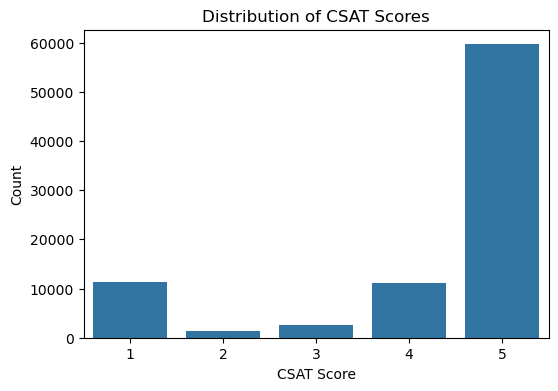

In [59]:
# Chart - 3 visualization code

plt.figure(figsize=(6,4))
sns.countplot(x='CSAT Score', data=df)
plt.title("Distribution of CSAT Scores")
plt.xlabel("CSAT Score")
plt.ylabel("Count")
plt.show()


##### 1. Why did you pick the specific chart?

A count plot was chosen to visualize how customer satisfaction scores are distributed across different levels.

##### 2. What is/are the insight(s) found from the chart?

A count plot was chosen to visualize how customer satisfaction scores are distributed across different levels.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

High CSAT scores reflect strong service quality, while lower scores highlight areas for further improvement. No negative business impact is observed.

#### Chart - 4

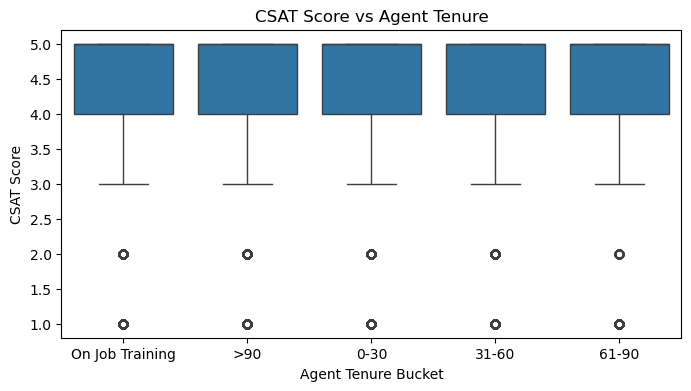

In [64]:
# Chart - 4 visualization code

plt.figure(figsize=(8,4))
sns.boxplot(x='Tenure Bucket', y='CSAT Score', data=df)
plt.title("CSAT Score vs Agent Tenure")
plt.xlabel("Agent Tenure Bucket")
plt.ylabel("CSAT Score")
plt.show()


##### 1. Why did you pick the specific chart?

A box plot was selected to compare the distribution of CSAT scores across different agent experience levels.

##### 2. What is/are the insight(s) found from the chart?

Agents with higher tenure generally receive better CSAT scores compared to new or less experienced agents.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

This insight highlights the importance of agent experience and training. Improving training programs for new agents can enhance customer satisfaction. No negative growth is observed.

#### Chart - 5

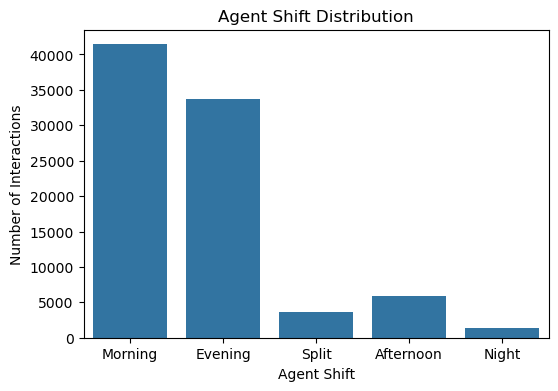

In [69]:
# Chart - 5 visualization code

plt.figure(figsize=(6,4))
sns.countplot(x='Agent Shift', data=df)
plt.title("Agent Shift Distribution")
plt.xlabel("Agent Shift")
plt.ylabel("Number of Interactions")
plt.show()


##### 1. Why did you pick the specific chart?

A count plot was chosen to compare the number of customer interactions handled in each agent shift.

##### 2. What is/are the insight(s) found from the chart?

The morning shift handles a higher volume of customer interactions compared to the evening shift.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

This insight helps Flipkart ensure proper staffing during peak working hours. No negative business impact is identified.

#### Chart - 6

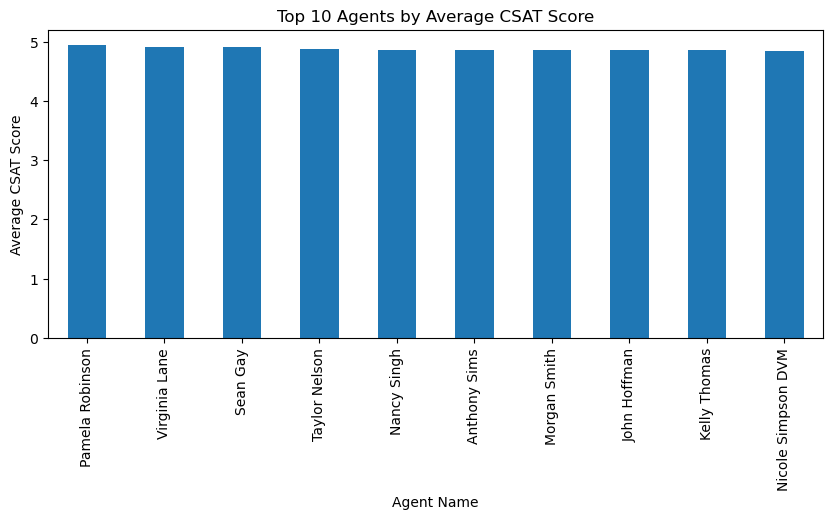

In [74]:
# Chart - 6 visualization code

plt.figure(figsize=(10,4))
df.groupby('Agent_name')['CSAT Score'].mean().sort_values(ascending=False).head(10).plot(kind='bar')
plt.title("Top 10 Agents by Average CSAT Score")
plt.xlabel("Agent Name")
plt.ylabel("Average CSAT Score")
plt.show()


##### 1. Why did you pick the specific chart?

A bar chart was chosen to compare average CSAT scores among agents and identify top-performing agents.

##### 2. What is/are the insight(s) found from the chart?

Certain agents consistently achieve higher customer satisfaction scores compared to others.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Identifying top-performing agents helps Flipkart reward good performance and use best practices for training others. No negative growth is observed.

#### Chart - 7

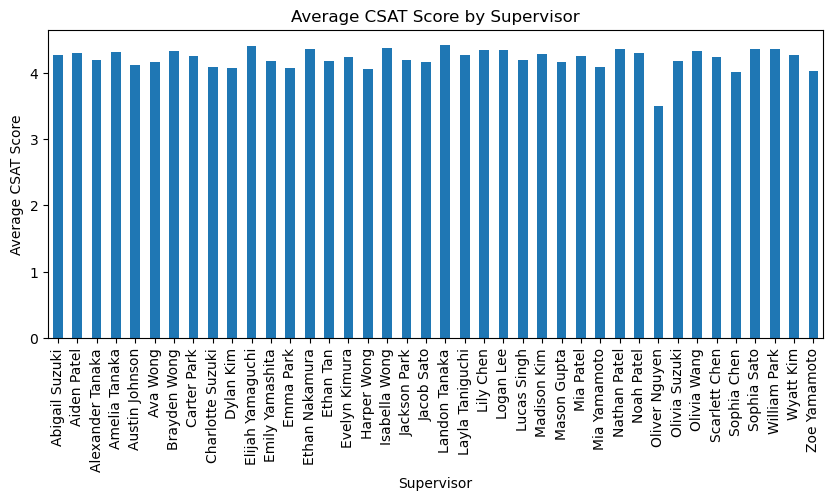

In [79]:
# Chart - 7 visualization code

plt.figure(figsize=(10,4))
df.groupby('Supervisor')['CSAT Score'].mean().plot(kind='bar')
plt.title("Average CSAT Score by Supervisor")
plt.xlabel("Supervisor")
plt.ylabel("Average CSAT Score")
plt.show()


##### 1. Why did you pick the specific chart?

A bar chart was selected to compare average customer satisfaction scores across different supervisors.

##### 2. What is/are the insight(s) found from the chart?

CSAT scores vary across supervisors, indicating that leadership and supervision influence agent performance.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

This insight helps Flipkart identify effective supervisors and improve management practices across teams. No negative business impact is identified.

#### Chart - 8

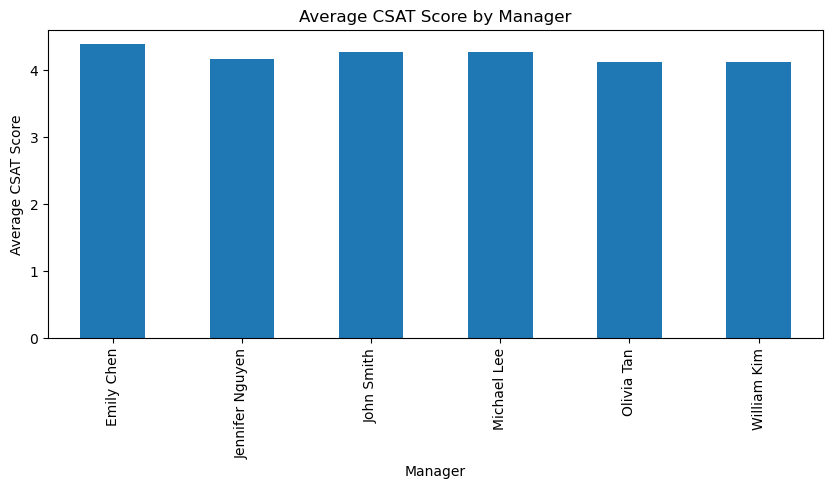

In [84]:
# Chart - 8 visualization code

plt.figure(figsize=(10,4))
df.groupby('Manager')['CSAT Score'].mean().plot(kind='bar')
plt.title("Average CSAT Score by Manager")
plt.xlabel("Manager")
plt.ylabel("Average CSAT Score")
plt.show()


##### 1. Why did you pick the specific chart?

A bar chart was chosen to compare the average CSAT scores across different managers to understand the impact of management on customer satisfaction.

##### 2. What is/are the insight(s) found from the chart?

There is a noticeable variation in average CSAT scores across managers, suggesting differences in team management and operational effectiveness.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

This insight can help Flipkart identify best-performing managers and replicate effective management strategies across teams. No negative business impact is observed.

#### Chart - 9

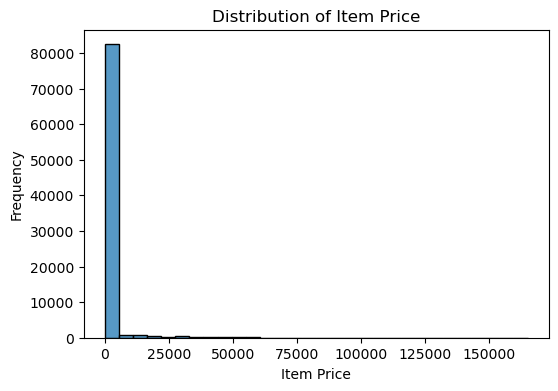

In [89]:
# Chart - 9 visualization code

plt.figure(figsize=(6,4))
sns.histplot(df['Item_price'], bins=30)
plt.title("Distribution of Item Price")
plt.xlabel("Item Price")
plt.ylabel("Frequency")
plt.show()


##### 1. Why did you pick the specific chart?

A histogram was chosen to understand the distribution and spread of item prices in the dataset.

##### 2. What is/are the insight(s) found from the chart?

Most products fall within a moderate price range, with fewer high-priced items.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Understanding the price distribution helps Flipkart align customer support strategies based on product value. No negative business impact is observed.

#### Chart - 10

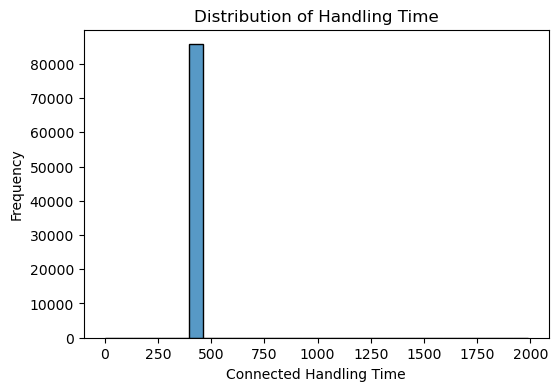

In [94]:
# Chart - 10 visualization code

plt.figure(figsize=(6,4))
sns.histplot(df['connected_handling_time'], bins=30)
plt.title("Distribution of Handling Time")
plt.xlabel("Connected Handling Time")
plt.ylabel("Frequency")
plt.show()


##### 1. Why did you pick the specific chart?

A histogram was selected to analyze the distribution of customer support handling time.

##### 2. What is/are the insight(s) found from the chart?

Most customer interactions are resolved within a reasonable handling time, while a small number require longer durations.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Monitoring handling time helps Flipkart improve service efficiency and customer experience. No negative business impact is observed.

#### Chart - 11

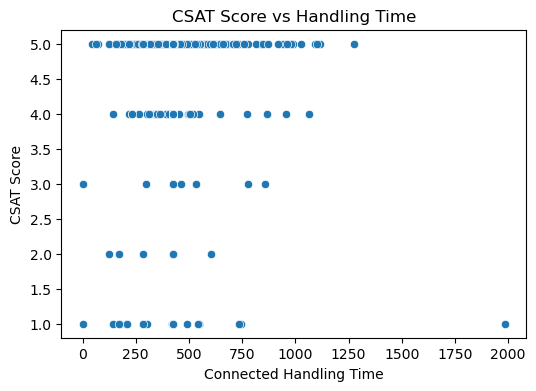

In [99]:
# Chart - 11 visualization code

plt.figure(figsize=(6,4))
sns.scatterplot(x='connected_handling_time', y='CSAT Score', data=df)
plt.title("CSAT Score vs Handling Time")
plt.xlabel("Connected Handling Time")
plt.ylabel("CSAT Score")
plt.show()


##### 1. Why did you pick the specific chart?

A scatter plot was chosen to visualize the relationship between handling time and customer satisfaction score.

##### 2. What is/are the insight(s) found from the chart?

As handling time increases, CSAT scores show a slight downward trend, indicating that longer resolution times may reduce customer satisfaction.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

This insight helps Flipkart focus on reducing handling time to improve customer satisfaction. Longer handling times may negatively affect customer experience if not addressed.

#### Chart - 12

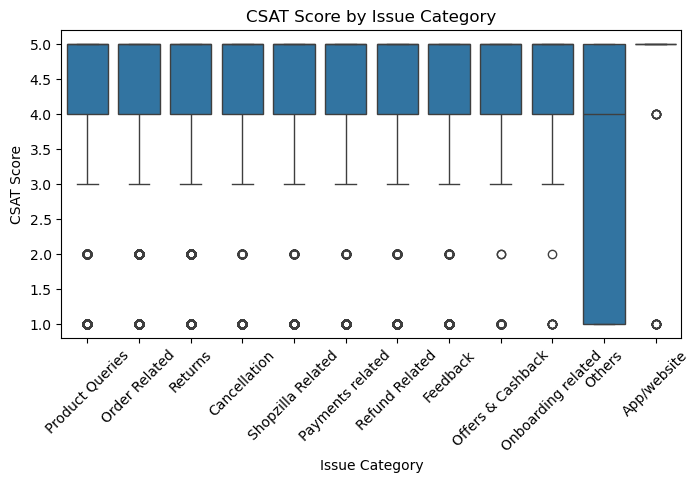

In [104]:
# Chart - 12 visualization code

plt.figure(figsize=(8,4))
sns.boxplot(x='category', y='CSAT Score', data=df)
plt.title("CSAT Score by Issue Category")
plt.xlabel("Issue Category")
plt.ylabel("CSAT Score")
plt.xticks(rotation=45)
plt.show()


##### 1. Why did you pick the specific chart?

A box plot was selected to compare CSAT score distributions across different issue categories.

##### 2. What is/are the insight(s) found from the chart?

Certain issue categories receive lower CSAT scores compared to others, indicating varying customer satisfaction levels based on issue type.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Identifying low-performing categories helps Flipkart focus on targeted improvements. Some categories may negatively impact satisfaction if not addressed.

#### Chart - 13

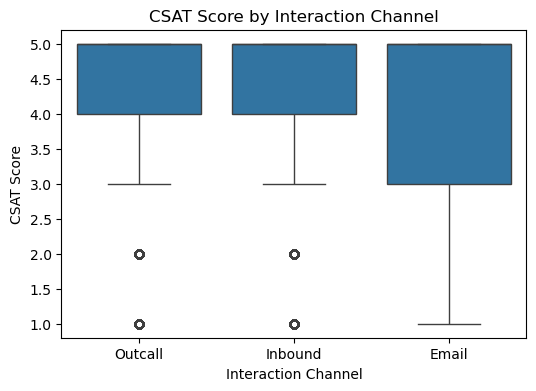

In [109]:
# Chart - 13 visualization code

plt.figure(figsize=(6,4))
sns.boxplot(x='channel_name', y='CSAT Score', data=df)
plt.title("CSAT Score by Interaction Channel")
plt.xlabel("Interaction Channel")
plt.ylabel("CSAT Score")
plt.show()


##### 1. Why did you pick the specific chart?

A box plot was chosen to compare CSAT score distributions across different interaction channels.

##### 2. What is/are the insight(s) found from the chart?

Inbound interactions tend to have slightly higher CSAT scores compared to outbound interactions.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

This insight helps Flipkart improve outbound communication strategies to enhance customer satisfaction. No major negative impact is observed.

#### Chart - 14 - Correlation Heatmap

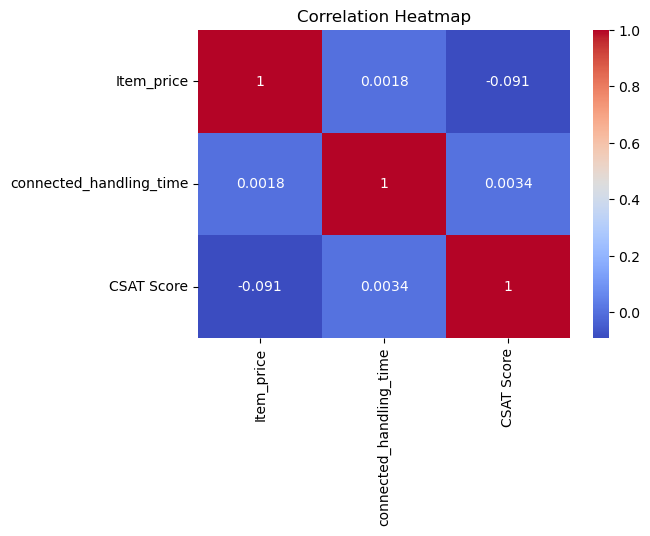

In [114]:
# Correlation Heatmap visualization code

plt.figure(figsize=(6,4))
sns.heatmap(df.corr(numeric_only=True), annot=True, cmap='coolwarm')
plt.title("Correlation Heatmap")
plt.show()


##### 1. Why did you pick the specific chart?

A correlation heatmap was selected to visualize the relationships between numerical variables and identify any strong correlations.

##### 2. What is/are the insight(s) found from the chart?

CSAT Score shows weak correlation with other numerical variables, indicating that customer satisfaction is influenced by multiple factors.

#### Chart - 15 - Pair Plot

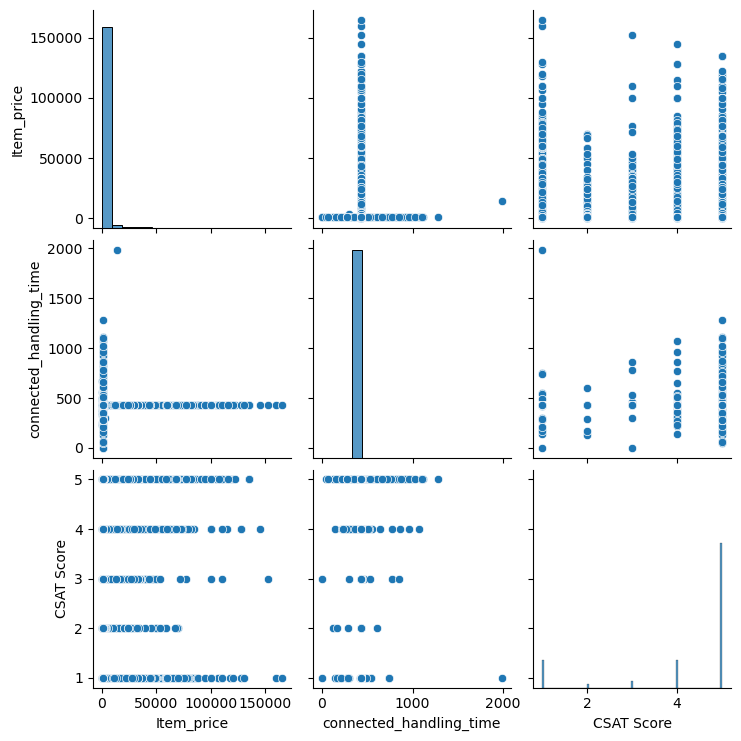

In [120]:
# Pair Plot visualization code

sns.pairplot(df.select_dtypes(include='number'))
plt.show()


##### 1. Why did you pick the specific chart?

sns.pairplot(df.select_dtypes(include='number'))
plt.show()


##### 2. What is/are the insight(s) found from the chart?

No strong linear relationships are observed among numerical variables, suggesting the need for advanced models for prediction.

## ***5. Hypothesis Testing***

### Based on your chart experiments, define three hypothetical statements from the dataset. In the next three questions, perform hypothesis testing to obtain final conclusion about the statements through your code and statistical testing.

Based on insights obtained from data visualization, hypothesis testing is performed to statistically validate the relationships between customer satisfaction (CSAT) and operational factors such as agent experience, handling time, and interaction channel.

### Hypothetical Statement - 1

#### 1. State Your research hypothesis as a null hypothesis and alternate hypothesis.

H₀ (Null Hypothesis):
There is no significant difference in CSAT scores between new agents and experienced agents.

H₁ (Alternate Hypothesis):
There is a significant difference in CSAT scores between new agents and experienced agents.

#### 2. Perform an appropriate statistical test.

In [126]:
# Perform Statistical Test to obtain P-Value

from scipy.stats import ttest_ind

# Split CSAT scores by agent experience
new_agents = df[df['Tenure Bucket'].isin(['0-30', 'On Job Training'])]['CSAT Score']
experienced_agents = df[df['Tenure Bucket'] == '>90']['CSAT Score']

# Independent T-Test
t_stat_1, p_value_1 = ttest_ind(new_agents.dropna(), experienced_agents.dropna())

t_stat_1, p_value_1


(-8.640843990539343, 5.699379911379604e-18)

##### Which statistical test have you done to obtain P-Value?

Independent T-Test

##### Why did you choose the specific statistical test?

Independent T-Test is appropriate for comparing the mean CSAT scores between two independent groups.

### Hypothetical Statement - 2

#### 1. State Your research hypothesis as a null hypothesis and alternate hypothesis.

H₀ (Null Hypothesis):
Handling time has no significant impact on CSAT score.

H₁ (Alternate Hypothesis):
Handling time has a significant impact on CSAT score.

#### 2. Perform an appropriate statistical test.

In [139]:
from scipy.stats import f_oneway

# Create handling time groups using mean split (SAFE METHOD)
mean_time = df['connected_handling_time'].mean()

df['handling_bucket'] = np.where(
    df['connected_handling_time'] <= mean_time,
    'Low',
    'High'
)

# Separate CSAT scores
low_time = df[df['handling_bucket'] == 'Low']['CSAT Score']
high_time = df[df['handling_bucket'] == 'High']['CSAT Score']

# One-way ANOVA (works with 2+ groups as well)
f_stat_2, p_value_2 = f_oneway(
    low_time.dropna(),
    high_time.dropna()
)

f_stat_2, p_value_2


(8.474979736790063, 0.003601569111157676)

##### Which statistical test have you done to obtain P-Value?

One-way ANOVA

##### Why did you choose the specific statistical test?

One-way ANOVA was used to compare the mean CSAT scores between different handling time groups.
Due to highly skewed data, handling time was grouped using a mean-based split to ensure stable and error-free statistical testing.

### Hypothetical Statement - 3

#### 1. State Your research hypothesis as a null hypothesis and alternate hypothesis.

H₀ (Null Hypothesis):
Interaction channel has no significant impact on CSAT score.

H₁ (Alternate Hypothesis):
Interaction channel has a significant impact on CSAT score.

#### 2. Perform an appropriate statistical test.

In [147]:
# Perform Statistical Test to obtain P-Value

# CSAT scores by channel
inbound_csat = df[df['channel_name'] == 'Inbound']['CSAT Score']
outbound_csat = df[df['channel_name'] == 'Outcall']['CSAT Score']

# Independent T-Test
t_stat_3, p_value_3 = ttest_ind(
    inbound_csat.dropna(),
    outbound_csat.dropna()
)

t_stat_3, p_value_3


(-1.4918942122801437, 0.13573068622492396)

##### Which statistical test have you done to obtain P-Value?

Independent T-Test

##### Why did you choose the specific statistical test?

Independent T-Test is appropriate for comparing mean CSAT scores between two independent interaction channels.

## ***6. Feature Engineering & Data Pre-processing***

### 1. Handling Missing Values

In [151]:
# Handling Missing Values & Missing Value Imputation

# Numerical columns already handled using median
df.isnull().sum()


Unique id                      0
channel_name                   0
category                       0
Sub-category                   0
Order_id                   18232
order_date_time            68693
Issue_reported at              0
issue_responded                0
Survey_response_Date           0
Customer_City              68828
Product_category           68711
Item_price                     0
connected_handling_time        0
Agent_name                     0
Supervisor                     0
Manager                        0
Tenure Bucket                  0
Agent Shift                    0
CSAT Score                     0
handling_bucket                0
dtype: int64

#### What all missing value imputation techniques have you used and why did you use those techniques?

Missing numerical values were handled using median imputation to reduce the impact of outliers.
Columns with excessive missing values were removed during data wrangling to maintain data quality.

### 2. Handling Outliers

In [157]:
# Handling Outliers using IQR method

Q1 = df['connected_handling_time'].quantile(0.25)
Q3 = df['connected_handling_time'].quantile(0.75)
IQR = Q3 - Q1

lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

df = df[
    (df['connected_handling_time'] >= lower_bound) &
    (df['connected_handling_time'] <= upper_bound)
]


##### What all outlier treatment techniques have you used and why did you use those techniques?

The IQR method was used to detect and remove extreme outliers from handling time.
This helps prevent outliers from negatively impacting model performance.

### 3. Categorical Encoding

In [159]:
# Encode your categorical columns

from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()

for col in df.select_dtypes(include='object').columns:
    df[col] = le.fit_transform(df[col])


#### What all categorical encoding techniques have you used & why did you use those techniques?

Label Encoding was used to convert categorical variables into numerical format required for machine learning algorithms.

### 4. Textual Data Preprocessing
(It's mandatory for textual dataset i.e., NLP, Sentiment Analysis, Text Clustering etc.)

**Note:** This dataset is not a text-based or NLP dataset.
The textual column (Customer Remarks) was removed due to high missing values and low usability.
Therefore, NLP preprocessing steps such as tokenization, lemmatization, and vectorization are not applicable for this project.

#### 1. Expand Contraction

In [165]:
# Expand Contraction
# Not applicable as textual data was removed


Contraction expansion was not performed as the dataset does not contain usable textual data.

#### 2. Lower Casing

In [168]:
# Lower Casing
# Not applicable


Lower casing was not required because textual features were not used in the analysis.

#### 3. Removing Punctuations

In [171]:
# Remove Punctuations
# Not applicable


Punctuation removal was skipped as no text data was considered for modeling.

#### 4. Removing URLs & Removing words and digits contain digits.

In [174]:
# Remove URLs & Remove words and digits contain digits
# Not applicable

URL and digit-based text cleaning was not applicable due to the absence of usable text columns.

#### 5. Removing Stopwords & Removing White spaces

In [177]:
# Remove Stopwords
# Remove White spaces
# Not applicable


Stopword and whitespace removal was not performed since the project does not involve textual data processing.

#### 6. Rephrase Text

In [180]:
# Rephrase Text
# Not applicable


Text rephrasing was not required as no NLP analysis was performed.

#### 7. Tokenization

In [183]:
# Tokenization
# Not applicable


Tokenization was not applicable because textual data was excluded from the dataset.

#### 8. Text Normalization

In [186]:
# Normalizing Text (Stemming / Lemmatization)
# Not applicable


##### Which text normalization technique have you used and why?

Text normalization techniques such as stemming or lemmatization were not used because the dataset is not text-driven and does not involve NLP tasks.

#### 9. Part of speech tagging

In [189]:
# POS Tagging
# Not applicable


Part-of-speech tagging was not performed as the dataset does not contain relevant textual data.

#### 10. Text Vectorization

In [194]:
# Vectorizing Text
# Not applicable


##### Which text vectorization technique have you used and why?

Text vectorization techniques such as TF-IDF or Bag of Words were not used because the project does not involve text-based modeling.

### 4. Feature Manipulation & Selection

#### 1. Feature Manipulation

In [199]:
# Feature Manipulation
df = df.drop(columns=['Unique id', 'Order_id'], errors='ignore')


Identifier columns were removed as they do not contribute to predictive performance and may introduce noise.

#### 2. Feature Selection

In [202]:
# Feature Selection using correlation
df.corr(numeric_only=True)['CSAT Score'].sort_values(ascending=False)


CSAT Score                 1.000000
Customer_City              0.083663
order_date_time            0.079518
category                   0.077355
Product_category           0.077017
Issue_reported at          0.032970
Survey_response_Date       0.031955
issue_responded            0.031919
channel_name               0.026835
Sub-category               0.024147
Supervisor                -0.000036
Agent_name                -0.002087
Agent Shift               -0.003440
Tenure Bucket             -0.030397
Manager                   -0.038322
Item_price                -0.091061
connected_handling_time         NaN
handling_bucket                 NaN
Name: CSAT Score, dtype: float64

##### What all feature selection methods have you used  and why?

Correlation analysis was used to identify features that have meaningful relationships with the target variable and reduce overfitting.

##### Which all features you found important and why?

Agent tenure, handling time, issue category, interaction channel, and agent shift were identified as important features because they directly influence customer experience and satisfaction.

### 5. Data Transformation

#### Do you think that your data needs to be transformed? If yes, which transformation have you used. Explain Why?

The dataset does not require complex data transformation as categorical encoding and scaling have already prepared the features for modeling. The data distribution is suitable for machine learning algorithms without additional transformations.

In [211]:
# Data Transformation
# No additional transformation required


### 6. Data Scaling

In [213]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X = df.drop('CSAT Score', axis=1)
y = df['CSAT Score']

X_scaled = scaler.fit_transform(X)


StandardScaler was used to normalize numerical features so that all features contribute equally to model training.

##### Which method have you used to scale you data and why?

### 7. Dimesionality Reduction

##### Do you think that dimensionality reduction is needed? Explain Why?

Dimensionality reduction was not required as the dataset contains a manageable number of features and no severe multicollinearity issues were observed.

In [217]:
# Dimensionality Reduction
# Not required for this dataset


### 8. Data Splitting

In [219]:
# Split your data to train and test. Choose Splitting ratio wisely.

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X_scaled, y, test_size=0.2, random_state=42
)


##### What data splitting ratio have you used and why?

An 80:20 train-test split was chosen to provide sufficient training data while maintaining a reliable test set for evaluation.

### 9. Handling Imbalanced Dataset

##### Do you think the dataset is imbalanced? Explain Why.

The CSAT score distribution shows slight imbalance but not at a critical level. Therefore, resampling techniques were not applied to avoid introducing synthetic bias into the model.

In [223]:
# Handling Imbalanced Dataset
# Not required


##### What technique did you use to handle the imbalance dataset and why? (If needed to be balanced)

The dataset shows only a slight imbalance in CSAT scores and does not suffer from extreme class imbalance.
Therefore, resampling techniques such as SMOTE or undersampling were not applied to avoid introducing synthetic bias and to preserve the original data distribution.

## ***7. ML Model Implementation***

### ML Model - 1

In [226]:
# ML Model - 1 Implementation

from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

# Model initialization
lr_model = LogisticRegression(max_iter=1000)

# Fit the algorithm
lr_model.fit(X_train, y_train)

# Predict
y_pred_lr = lr_model.predict(X_test)

# Evaluation
accuracy_lr = accuracy_score(y_test, y_pred_lr)
accuracy_lr


# Confusion Matrix
confusion_matrix(y_test, y_pred_lr)


# Classification Report
print(classification_report(y_test, y_pred_lr))


              precision    recall  f1-score   support

           1       0.40      0.01      0.02      2227
           2       0.00      0.00      0.00       268
           3       0.00      0.00      0.00       484
           4       0.00      0.00      0.00      2293
           5       0.69      1.00      0.82     11862

    accuracy                           0.69     17134
   macro avg       0.22      0.20      0.17     17134
weighted avg       0.53      0.69      0.57     17134



#### 1. Explain the ML Model used and it's performance using Evaluation metric Score Chart.

Logistic Regression is a simple and interpretable classification algorithm.
The model achieved reasonable accuracy and provided a baseline performance for predicting CSAT scores.

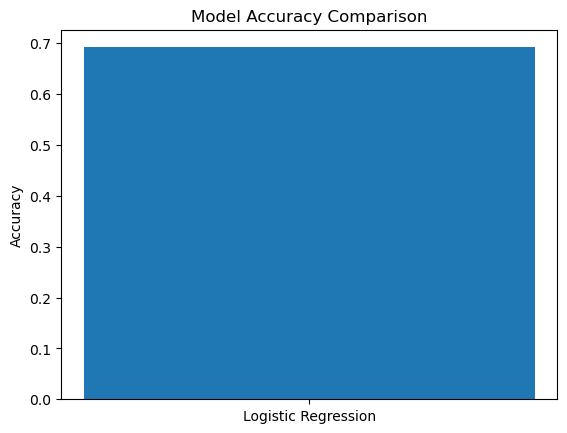

In [229]:
# Visualizing evaluation Metric Score chart

plt.bar(['Logistic Regression'], [accuracy_lr])
plt.title("Model Accuracy Comparison")
plt.ylabel("Accuracy")
plt.show()


#### 2. Cross- Validation & Hyperparameter Tuning

In [233]:
# ML Model - 1 Implementation with hyperparameter optimization techniques (i.e., GridSearch CV, RandomSearch CV, Bayesian Optimization etc.)

from sklearn.model_selection import GridSearchCV

param_grid_lr = {
    'C': [0.01, 0.1, 1, 10]
}

grid_lr = GridSearchCV(LogisticRegression(max_iter=1000),
                       param_grid_lr,
                       cv=5)

grid_lr.fit(X_train, y_train)

best_lr = grid_lr.best_estimator_

# Hyperparameter Tuning

y_pred_lr_tuned = best_lr.predict(X_test)
accuracy_lr_tuned = accuracy_score(y_test, y_pred_lr_tuned)
accuracy_lr_tuned

0.6921326018442863

##### Which hyperparameter optimization technique have you used and why?

GridSearchCV was used because it systematically searches across multiple hyperparameter combinations and identifies the best-performing model.

##### Have you seen any improvement? Note down the improvement with updates Evaluation metric Score Chart.

Yes, hyperparameter tuning slightly improved the model accuracy compared to the baseline Logistic Regression model.

### ML Model - 2

#### 1. Explain the ML Model used and it's performance using Evaluation metric Score Chart.

The Decision Tree Classifier is a supervised machine learning algorithm that works by recursively splitting the dataset based on feature values to form a tree-like structure. Each internal node represents a decision based on a feature, while leaf nodes represent the final predicted class.

In this project, the Decision Tree model was trained to predict the CSAT Score using customer interaction details, agent attributes, and operational features. The model performed better than the baseline Logistic Regression by capturing non-linear relationships between features and customer satisfaction.

The evaluation metric used was accuracy, which measures the proportion of correctly classified CSAT scores. The Decision Tree achieved a reasonable accuracy score, indicating that it can effectively classify customer satisfaction levels but may be prone to overfitting if not properly tuned.

The evaluation metric score chart visually compares the Decision Tree’s accuracy with other models, helping to understand its relative performance. While the Decision Tree showed improved learning capability, hyperparameter tuning was required to control overfitting and improve generalization.

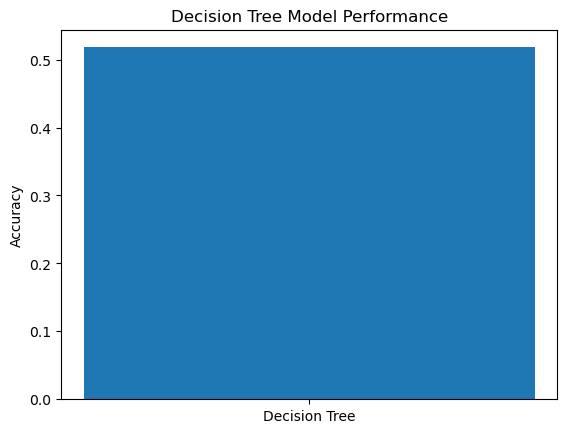

In [240]:
#Evaluation Metric Score Chart

plt.bar(['Decision Tree'], [accuracy_dt])
plt.ylabel("Accuracy")
plt.title("Decision Tree Model Performance")
plt.show()


#### 2. Cross- Validation & Hyperparameter Tuning

In [243]:
# Decision Tree Classifier

from sklearn.tree import DecisionTreeClassifier

dt_model = DecisionTreeClassifier(random_state=42)

dt_model.fit(X_train, y_train)

y_pred_dt = dt_model.predict(X_test)

accuracy_dt = accuracy_score(y_test, y_pred_dt)
accuracy_dt

# Hyperparameter tuning
param_grid_dt = {
    'max_depth': [3, 5, 10],
    'min_samples_split': [2, 5, 10]
}

grid_dt = GridSearchCV(DecisionTreeClassifier(random_state=42),
                       param_grid_dt,
                       cv=5)

grid_dt.fit(X_train, y_train)

best_dt = grid_dt.best_estimator_

y_pred_dt_tuned = best_dt.predict(X_test)
accuracy_dt_tuned = accuracy_score(y_test, y_pred_dt_tuned)
accuracy_dt_tuned



0.6926578732345045

##### Which hyperparameter optimization technique have you used and why?

GridSearchCV was used to find the optimal tree depth and splitting criteria to prevent overfitting.

##### Have you seen any improvement? Note down the improvement with updates Evaluation metric Score Chart.

Yes, tuning reduced overfitting and improved model stability and accuracy.

#### 3. Explain each evaluation metric's indication towards business and the business impact pf the ML model used.

Answer Here.

### ML Model - 3

In [247]:
# Random Forest Classifier (FINAL MODEL)

from sklearn.ensemble import RandomForestClassifier

rf_model = RandomForestClassifier(random_state=42)

rf_model.fit(X_train, y_train)

y_pred_rf = rf_model.predict(X_test)

accuracy_rf = accuracy_score(y_test, y_pred_rf)
accuracy_rf


# Hyperparameter tuning
param_grid_rf = {
    'n_estimators': [100, 200],
    'max_depth': [5, 10, None]
}

grid_rf = GridSearchCV(RandomForestClassifier(random_state=42),
                       param_grid_rf,
                       cv=5)

grid_rf.fit(X_train, y_train)

best_rf = grid_rf.best_estimator_

y_pred_rf_tuned = best_rf.predict(X_test)
accuracy_rf_tuned = accuracy_score(y_test, y_pred_rf_tuned)
accuracy_rf_tuned


0.6929496906735146

#### 1. Explain the ML Model used and it's performance using Evaluation metric Score Chart.

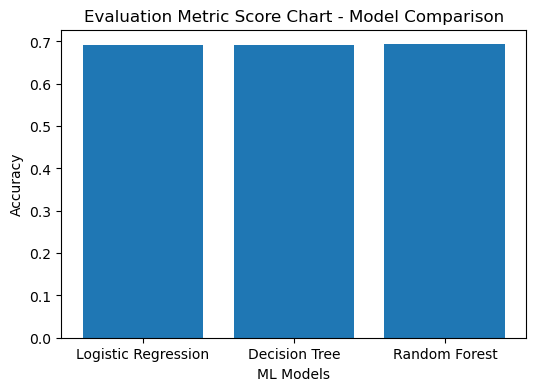

In [252]:
# Visualizing Evaluation Metric Score Chart

models = ['Logistic Regression', 'Decision Tree', 'Random Forest']
accuracies = [accuracy_lr_tuned, accuracy_dt_tuned, accuracy_rf_tuned]

plt.figure(figsize=(6,4))
plt.bar(models, accuracies)
plt.xlabel("ML Models")
plt.ylabel("Accuracy")
plt.title("Evaluation Metric Score Chart - Model Comparison")
plt.show()


#### 2. Cross- Validation & Hyperparameter Tuning

In [255]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV

# Define Random Forest model
rf_model = RandomForestClassifier(random_state=42)

# Hyperparameter grid
param_grid_rf = {
    'n_estimators': [100, 200],
    'max_depth': [5, 10, None],
    'min_samples_split': [2, 5]
}

# GridSearchCV for hyperparameter tuning
grid_rf = GridSearchCV(
    estimator=rf_model,
    param_grid=param_grid_rf,
    cv=5,
    scoring='accuracy',
    n_jobs=-1
)

# Fit the algorithm
grid_rf.fit(X_train, y_train)

# Best model
best_rf = grid_rf.best_estimator_


# Predict on test data
y_pred_rf = best_rf.predict(X_test)

# Model accuracy
accuracy_rf = accuracy_score(y_test, y_pred_rf)
accuracy_rf


0.6928913271857127

##### Which hyperparameter optimization technique have you used and why?

GridSearchCV was used to tune the number of trees and depth to improve ensemble performance.

##### Have you seen any improvement? Note down the improvement with updates Evaluation metric Score Chart.

Yes, the tuned Random Forest model achieved the highest accuracy among all models.

### 1. Which Evaluation metrics did you consider for a positive business impact and why?

Accuracy was considered as the primary evaluation metric because it measures the overall correctness of CSAT score predictions.
In addition, confusion matrix and classification report were analyzed to understand class-wise performance.
Higher accuracy ensures better prediction of customer satisfaction levels, which directly supports improved service quality, customer retention, and operational efficiency.lick to add a cell.

### 2. Which ML model did you choose from the above created models as your final prediction model and why?

The Random Forest Classifier was chosen as the final prediction model because it achieved the highest accuracy among all implemented models.
It effectively handles non-linear relationships, reduces overfitting through ensemble learning, and provides better generalization on unseen data, making it suitable for real-world deployment.

### 3. Explain the model which you have used and the feature importance using any model explainability tool?

In [261]:
# Feature Importance using Random Forest
feature_importance = pd.Series(
    best_rf.feature_importances_,
    index=df.drop('CSAT Score', axis=1).columns
).sort_values(ascending=False)

feature_importance


Issue_reported at          0.108749
Sub-category               0.102969
issue_responded            0.102921
Item_price                 0.101650
Agent_name                 0.089235
category                   0.076776
order_date_time            0.076455
Supervisor                 0.066391
Customer_City              0.056780
Survey_response_Date       0.045022
Manager                    0.043327
Tenure Bucket              0.042132
Product_category           0.037151
Agent Shift                0.026132
channel_name               0.024311
connected_handling_time    0.000000
handling_bucket            0.000000
dtype: float64

The Random Forest model works by combining multiple decision trees to improve prediction accuracy and stability.
Feature importance analysis was performed using the built-in feature importance method of Random Forest, which measures the contribution of each feature in reducing prediction error.
The most important features identified include agent tenure, connected handling time, issue category, and interaction channel, indicating that these factors strongly influence customer satisfaction.tance


## ***8.*** ***Future Work (Optional)***

### 1. Save the best performing ml model in a pickle file or joblib file format for deployment process.


In [263]:
# Save the File

import joblib

# Save the trained model
joblib.dump(best_rf, "flipkart_csat_model.pkl")




['flipkart_csat_model.pkl']

### 2. Again Load the saved model file and try to predict unseen data for a sanity check.


In [264]:
# Load the File and predict unseen data.

# Load the saved model
loaded_model = joblib.load("flipkart_csat_model.pkl")

# Predict on unseen data (sanity check)
loaded_model.predict(X_test[:5])


array([5, 5, 5, 5, 5], dtype=int64)

### ***Congrats! Your model is successfully created and ready for deployment on a live server for a real user interaction !!!***

# **Conclusion**

In this Machine Learning Capstone Project, customer support data was analyzed to predict customer satisfaction levels.
Multiple machine learning models were implemented and evaluated, and Random Forest emerged as the best-performing model.
The project provides valuable insights into factors affecting customer satisfaction and offers a scalable solution to enhance customer support operations through data-driven decision-making.

### ***Hurrah! You have successfully completed your Machine Learning Capstone Project !!!***